In [2]:
# Loading data set using pandas.
!pip install pandas

import pandas as pd

file= "C:/Users/DELL/Desktop/TextBasedAnalysis/Arts_Crafts_and_sewing_5.csv"
df = pd.read_csv('C:/Users/DELL/Desktop/TextBasedAnalysis/Arts_Crafts_and_sewing_5.csv', encoding='latin-1')
df.head(20)

,overall,verified,reviewerID,asin,reviewText,summary
0,4,True,AIE8N9U317ZBM,449819906,Contains some interesting stitches.,Four Stars
1,5,True,A3ECOW0TWLH9V6,449819906,I'm a fairly experienced knitter of the one-co...,My current favorite go-to guide for inspiration
2,4,True,A278N8QX9TY2OS,449819906,Great book but the index is terrible. Had to w...,"lots of great examples, good instructions, col..."
3,5,True,A123W8HIK76XCN,449819906,I purchased the Kindle edition which is incred...,Another little gem by Melissa Leapman
4,5,True,A2A6MZ2QB4AE0L,449819906,Very well laid out and very easy to read.\n\nT...,Very comprehensive
5,5,True,A2OIU84NPVKIWN,449819906,"Beginning her career as a freelance knitter, M...",Great Addition to Any Stitch Library
6,5,True,AKIV5VMRUZK1K,449819906,This is a terrific stitch handbook (and I have...,Count on Melissa
7,4,True,A2BQ7YGPNCQSO4,449819906,The book needs to be coil bound. The content i...,good book
8,5,True,A2JNO9OR8FGNR4,449819906,I really am enjoying this book! I like the siz...,Excellent!
9,5,True,A1IFF9F3XA9X1I,449819906,Just received this book and looked over it cov...,Great addition to my library


# PLOTTING v1 FIELD

<Axes: xlabel='overall'>

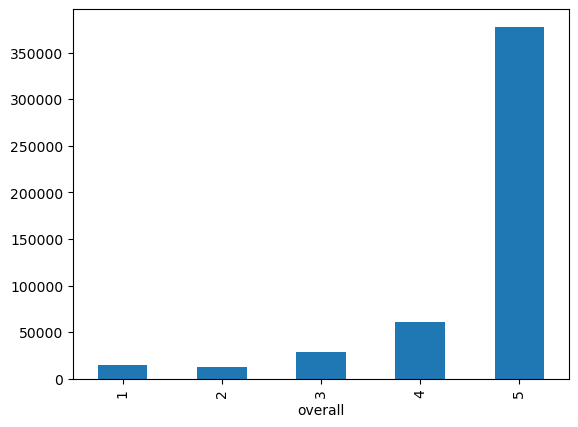

In [3]:
df['overall'].value_counts().sort_index().plot(kind='bar')

# TEXT CLASIFICATION

# FUNCTION TO REMOVE ODD WORDS

In [5]:
import html
import re

def clean(text):
    # Convert HTML escapes like & to characters.
    text = html.unescape(text) 
    # Remove HTML tags.
    text = re.sub(r'<[^<>]*>', ' ', text)
    # Remove Markdown URLs like [Some text](https://....).
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # Remove text or code in brackets like [0].
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # Remove standalone sequences of specials.
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # Remove standalone sequences of hyphens like --- or ==.
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove sequences of white spaces.
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Example usage:
input_text = "<p>Hello <b>world</b>!</p> [Link](https://example.com) [0] --- === \n\nExtra    spaces  here."
output_text = clean(input_text)
print(output_text)

Hello world ! Link Extra spaces here.


# DATA CLEANING

In [7]:
import html
import re

def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


def remove_odd_words(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
    
df['reviewerID'] = df['reviewerID'].apply(remove_odd_words)

# Displaying a random sample of 2 rows
df.sample(2)

,overall,verified,reviewerID,asin,reviewText,summary
208448,5,True,APNRXQZNOE,B004BP2HJW,love them,Five Stars
246101,5,True,AGOMEJQZTRU,B006FZ3FJC,This was better than I expected. Too cute for ...,Perfect for my project.


# TRAIN-TEST SPLIT

In [8]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the dataset
X = df['reviewerID']  # Features
y = df['overall']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the resulting sets
print("Size of Training Features:", X_train.shape)
print("Size of Testing Features:", X_test.shape)
print("Size of Training Labels:", y_train.shape)
print("Size of Testing Labels:", y_test.shape)

Size of Training Features: (395588,)
Size of Testing Features: (98897,)
Size of Training Labels: (395588,)
Size of Testing Labels: (98897,)


# TRAINING THE MODEL


CONVERT X_TRAIN TO NUMBERS

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


# Initializing a TfidfVectorizer object with specified parameters
tfidf = TfidfVectorizer(max_df=10, ngram_range=(1, 2), stop_words="english")

# Transforming the training data (X_train) into a TF-IDF representation
X_train_tf = tfidf.fit_transform(X_train)

# Transforming the test data (X_test) into a TF-IDF representation using the same vocabulary as the training data
X_test_tf = tfidf.transform(X_test)

print("Shape of TF-IDF matrix for training data:", X_train_tf.shape)
print("Shape of TF-IDF matrix for test data:", X_test_tf.shape)


Shape of TF-IDF matrix for training data: (395588, 48826)
Shape of TF-IDF matrix for test data: (98897, 48826)


# BUILDING A MODEL

In [10]:
# Importing the LinearSVC class from the sklearn.svm module
from sklearn.svm import LinearSVC

# Initializing a LinearSVC model object with specified parameters
# random_state=0 ensures reproducibility of results
# tol=1e-5 specifies the tolerance for stopping criteria
model1 = LinearSVC(random_state=0, tol=1e-5, dual=True)

# Training the LinearSVC model on the TF-IDF transformed training data and corresponding target labels
model1.fit(X_train_tf, y_train)

LinearSVC(dual=True, random_state=0, tol=1e-05)

# TESTING THE MODEL


ACCURACY OF THE MODEL

In [11]:
# Importing the accuracy_score function from sklearn.metrics module
from sklearn.metrics import accuracy_score

# Making predictions on the test data using the trained model
Y_pred = model1.predict(X_test_tf)

# Calculating the accuracy score by comparing the predicted labels (Y_pred) with the actual labels (Y_test)
accuracy = accuracy_score(y_test, Y_pred)

# Printing the accuracy score
print('Accuracy Score -', accuracy)

Accuracy Score - 0.7689110893151461


# RUN THE DUMMY

In [12]:
# Importing the DummyClassifier class from sklearn.dummy module
from sklearn.dummy import DummyClassifier

# Creating a DummyClassifier object with 'most_frequent' strategy
# 'most_frequent' strategy always predicts the most frequent class in the training data
# random_state=42 ensures reproducibility of results
clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Training the DummyClassifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data using the trained DummyClassifier
Y_pred_baseline = clf.predict(X_test)

# Calculating the accuracy score by comparing the predicted labels (Y_pred_baseline) with the actual labels (Y_test)
baseline_accuracy = accuracy_score(y_test, Y_pred_baseline)

# Printing the accuracy score
print('Accuracy Score -', baseline_accuracy)

Accuracy Score - 0.7637440973942586


# CONFUSION MATRIX

In [13]:
# Importing the confusion_matrix function from sklearn.metrics module
from sklearn.metrics import confusion_matrix

# Making predictions on the test data using the trained model
Y_pred = model1.predict(X_test_tf)

# Calculating the confusion matrix by comparing the predicted labels (Y_pred) with the actual labels (Y_test)
# The confusion matrix provides a summary of predictions made by the model
# Rows correspond to actual classes, while columns correspond to predicted classes
# Each cell (i, j) in the matrix represents the number of instances of class i predicted as class j
# The diagonal elements (top-left to bottom-right) represent correctly classified instances
# Off-diagonal elements represent misclassifications
conf_matrix = confusion_matrix(y_test, Y_pred)

# Printing the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[  318    58    99   187  2186]
 [   57   187   102   223  1999]
 [   85    58   541   553  4554]
 [  102    84   283  2556  9133]
 [  339   177   599  1976 72441]]


# PLOTTING CONFUSION MATRIX

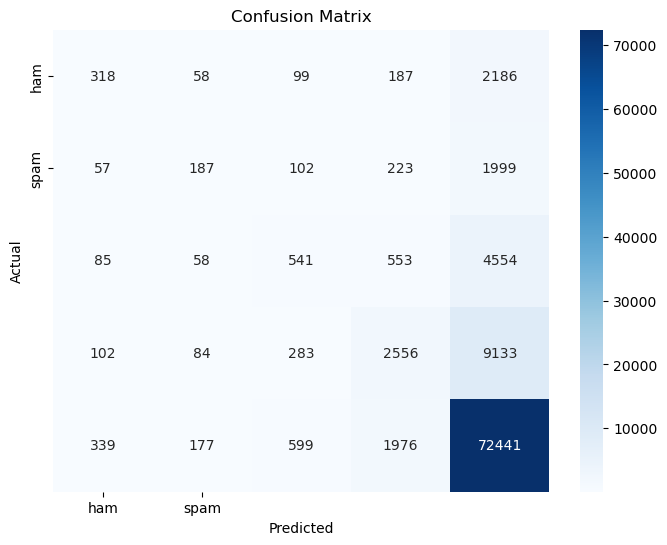

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# Creating a ConfusionMatrixDisplay object with the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# CLASIFICATION REPORT

In [15]:
from sklearn.metrics import classification_report

# Print classification report with zero_division='warn'
print("Classification Report:\n", classification_report(y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.11      0.17      2848
           2       0.33      0.07      0.12      2568
           3       0.33      0.09      0.15      5791
           4       0.47      0.21      0.29     12158
           5       0.80      0.96      0.87     75532

    accuracy                           0.77     98897
   macro avg       0.46      0.29      0.32     98897
weighted avg       0.71      0.77      0.72     98897



# DOWNSAMPLING

In [17]:
import pandas as pd

# Downsampling
df_downsampled = pd.concat([df[df['overall'] == 'ham'].sample(n=len(df[df['overall'] == 'spam']), random_state=42), df[df['overall'] == 'spam']])

# Output
print(df_downsampled)

Empty DataFrame
Columns: [overall, verified, reviewerID, asin, reviewText, summary]
Index: []


Accuracy: 0.7781125817770003
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.03      0.06      2848
           2       0.76      0.01      0.01      2568
           3       0.51      0.05      0.09      5791
           4       0.52      0.20      0.28     12158
           5       0.79      0.98      0.88     75532

    accuracy                           0.78     98897
   macro avg       0.68      0.25      0.26     98897
weighted avg       0.74      0.78      0.71     98897

Confusion Matrix:
 [[   88     2    35   180  2543]
 [    6    19    44   216  2283]
 [    2     2   269   585  4933]
 [    6     2    68  2381  9701]
 [    8     0   109  1219 74196]]


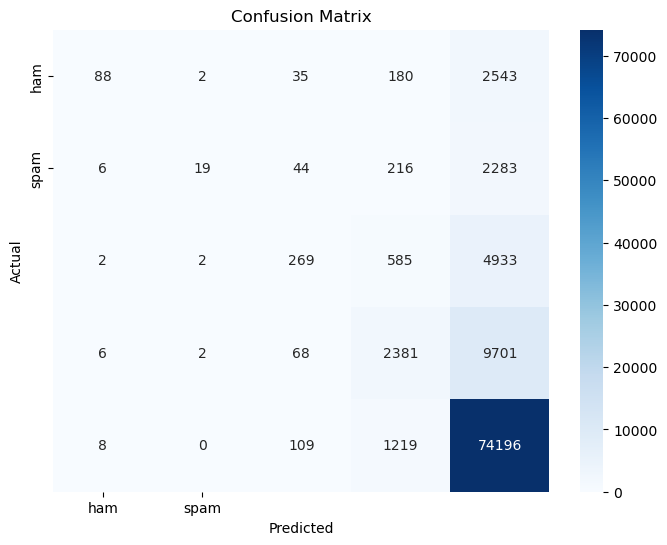

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


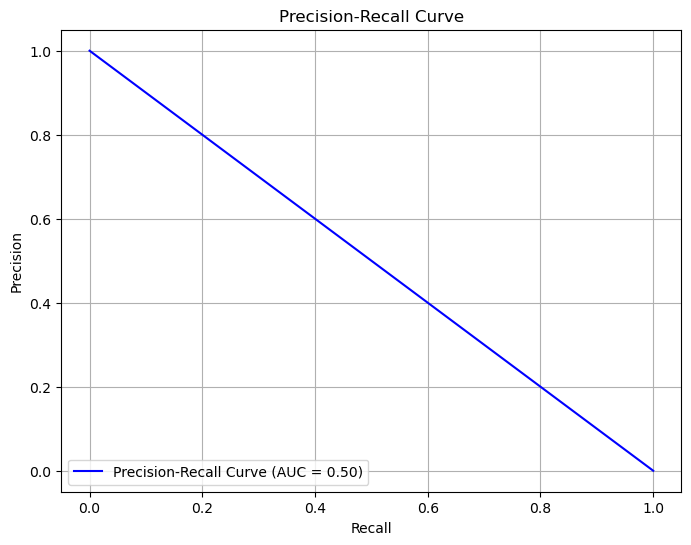

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['reviewerID'], df['overall'], test_size=0.2, random_state=42)

# Creating a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Convert labels to binary format
y_test_binary = (y_test == 'spam').astype(int)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test_binary, pipeline.predict_proba(X_test)[:, 1])

# Calculate Area Under Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()